In [2]:
# import libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# custom libraries
from tools import MSE, esn_prediction, param_string, optimal_values
from optimizers import grid_optimizer
from pyESN.pyESN import ESN
from lorenz96 import generate_L96

[[ 8.01        8.          8.          8.          8.        ]
 [ 8.00989774  7.99993573  7.99920898  8.00003436  8.00082362]
 [ 8.00978079  7.99974244  7.9984401   8.00014576  8.00169258]
 ...
 [ 0.68198407  1.59182187  8.34845403 -1.36431546  1.11897739]
 [ 0.79059432  1.70774657  8.31096799 -1.30802002  1.28843559]
 [ 0.90386173  1.82866077  8.27048338 -1.24823185  1.4499085 ]]


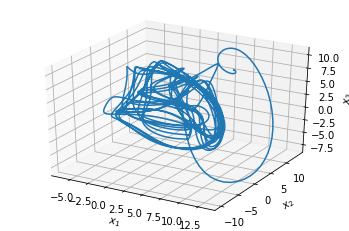

In [3]:
t = np.arange(0,30.0, 0.01)
x = generate_L96(t)

print(x)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

In [4]:
x.shape

(3000, 5)

In [5]:
params = {'n_reservoir':1000, 
          'sparsity':0.1, 
          'rand_seed':85, 
          'rho':1.5, 
          'noise':0.0001, 
          'future':72, 
          'window':72, 
          'trainlen':2000}

In [6]:
tic = time.perf_counter()

init_pred = esn_prediction(x, params)

toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

This simulation took 1.26 seconds
This simulation took 0.02 minutes


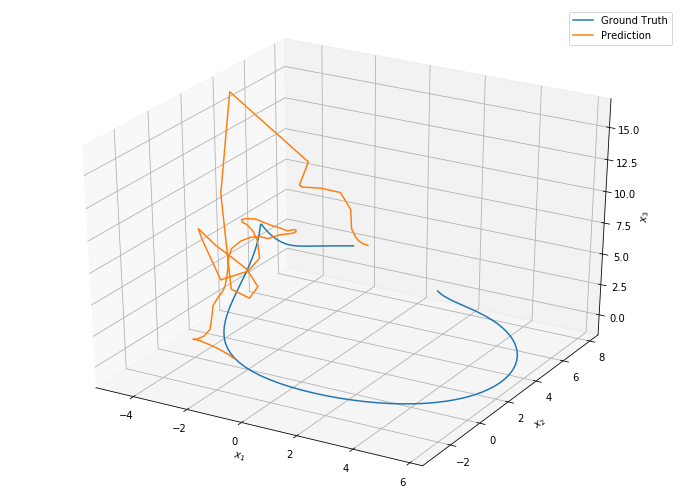

In [27]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection="3d")
futureTotal = params['future']
ax.plot(x[-2*futureTotal:, 0], x[-2*futureTotal:, 1], x[-2*futureTotal:, 2], label='Ground Truth')
ax.plot(init_pred[:, 0], init_pred[:, 1], init_pred[:, 2], label='Prediction')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.legend()
plt.show()

Optimizing over ['rho', 'noise']:
rho = 0.5, noise = 0.0001, MSE=1.7758141840140134
rho = 0.5, noise = 0.0003, MSE=2.247417357943813
rho = 0.5, noise = 0.0007, MSE=2.526258567150889
rho = 0.5, noise = 0.001, MSE=2.368390859944365
rho = 0.5, noise = 0.003, MSE=3.5351234718123603
rho = 0.5, noise = 0.005, MSE=2.917290471340568
rho = 0.5, noise = 0.007, MSE=1.4496536601514167
rho = 0.5, noise = 0.01, MSE=1.5311279501041413
rho = 0.7, noise = 0.0001, MSE=5.169333136801214
rho = 0.7, noise = 0.0003, MSE=3.970385339733589
rho = 0.7, noise = 0.0007, MSE=3.7974477063628864
rho = 0.7, noise = 0.001, MSE=2.747450704493447
rho = 0.7, noise = 0.003, MSE=3.0459103453700203
rho = 0.7, noise = 0.005, MSE=3.7800148102508873
rho = 0.7, noise = 0.007, MSE=4.923103541126837
rho = 0.7, noise = 0.01, MSE=5.1770178224424575
rho = 0.9, noise = 0.0001, MSE=4.610295328895539
rho = 0.9, noise = 0.0003, MSE=4.404114133490686
rho = 0.9, noise = 0.0007, MSE=3.7308691844339195
rho = 0.9, noise = 0.001, MSE=3.251360

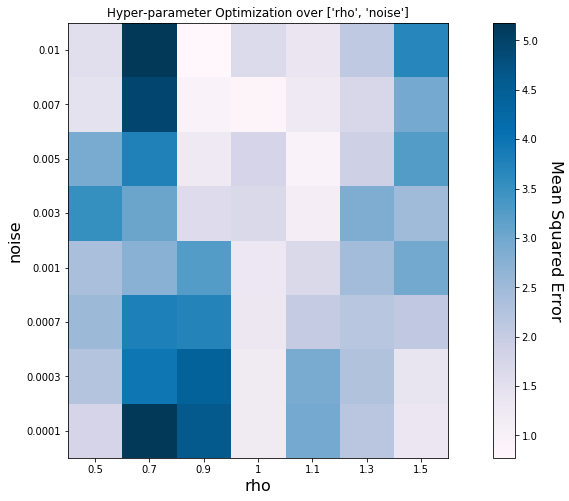

In [10]:
tic = time.perf_counter()
radius_set = [0.5, 0.7, 0.9,  1,  1.1,1.3,1.5]
noise_set = [ 0.0001, 0.0003,0.0007, 0.001, 0.003, 0.005, 0.007,0.01]

radiusxnoise_loss = grid_optimizer(x,
                      params,
                      args=['rho', 'noise'],
                      xset=radius_set,
                      yset=noise_set,
                      verbose=True,
                      visualize=True)

toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

In [11]:
opt_radius, opt_noise = optimal_values(radiusxnoise_loss, radius_set, noise_set)
params['rho'] = opt_radius
params['noise'] = opt_noise
print(f'The optimal set is:\nspectrum radius = {opt_radius} \nnoise = {opt_noise}')

The optimal set is:
spectrum radius = 0.9 
noise = 0.01


Optimizing over ['n_reservoir', 'sparsity']:
n_reservoir = 600, sparsity = 0.005, MSE=3.5741890333972868
n_reservoir = 600, sparsity = 0.01, MSE=2.106966051758225
n_reservoir = 600, sparsity = 0.03, MSE=3.7133674669713064
n_reservoir = 600, sparsity = 0.05, MSE=3.595966572342046
n_reservoir = 600, sparsity = 0.1, MSE=3.629130492355325
n_reservoir = 600, sparsity = 0.15, MSE=1.4491369987229095
n_reservoir = 600, sparsity = 0.2, MSE=5.076803545890409
n_reservoir = 800, sparsity = 0.005, MSE=4.706011247903898
n_reservoir = 800, sparsity = 0.01, MSE=3.7652520310265443
n_reservoir = 800, sparsity = 0.03, MSE=2.3959917614191535
n_reservoir = 800, sparsity = 0.05, MSE=6.304652449780711
n_reservoir = 800, sparsity = 0.1, MSE=5.102556300379418
n_reservoir = 800, sparsity = 0.15, MSE=5.404992588546935
n_reservoir = 800, sparsity = 0.2, MSE=3.905274433971442
n_reservoir = 1000, sparsity = 0.005, MSE=4.834516194210537
n_reservoir = 1000, sparsity = 0.01, MSE=5.117366385821551
n_reservoir = 1000, s

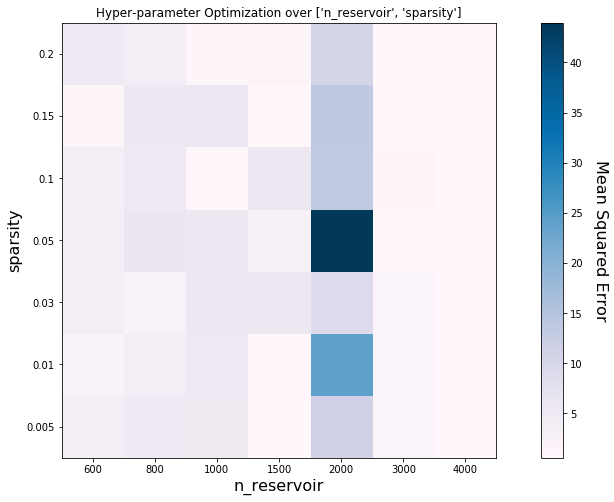

In [12]:
tic = time.perf_counter()
reservoir_set = [600, 800, 1000, 1500, 2000, 3000, 4000]
sparsity_set = [0.005, 0.01, 0.03, 0.05, 0.1, 0.15, 0.2]

sizexsparsity_loss = grid_optimizer(x,
                      params,
                      args=['n_reservoir', 'sparsity'],
                      xset=reservoir_set,
                      yset=sparsity_set,
                      verbose=True,
                      visualize=True)

toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

In [13]:
opt_size, opt_sparsity = optimal_values(sizexsparsity_loss, reservoir_set, sparsity_set)
params['n_reservoir'] = opt_size
params['sparsity'] = opt_sparsity
print(f'The optimal set is:\nreservoir size = {opt_size} \nsparsity = {opt_sparsity}')

The optimal set is:
reservoir size = 4000 
sparsity = 0.03


Optimizing over ['trainlen']:
trainlen = 400, MSE=0.5485784710860221
trainlen = 500, MSE=0.3521236566955866
trainlen = 600, MSE=2.1493485408202333
trainlen = 700, MSE=1.5439179945130177
trainlen = 800, MSE=2.2254584746415706
trainlen = 900, MSE=0.6298654733932325
trainlen = 1000, MSE=2.1889614187979283
trainlen = 1100, MSE=0.7872118843416206
trainlen = 1200, MSE=0.3286974419068878
trainlen = 1300, MSE=1.7316187583134701
trainlen = 1400, MSE=0.5409130258948442
trainlen = 1500, MSE=0.34830932005456045
trainlen = 1600, MSE=1.8689837737067707
trainlen = 1700, MSE=0.6326798839019158
trainlen = 1800, MSE=0.7013155517624873
trainlen = 1900, MSE=0.6657722196309891
trainlen = 2000, MSE=0.5800519302000968
trainlen = 2100, MSE=2.0156224658142237
trainlen = 2200, MSE=0.6846119556781873
trainlen = 2300, MSE=0.7747819606416897
trainlen = 2400, MSE=1.611281760688178
This simulation took 627.69 seconds
This simulation took 10.46 minutes


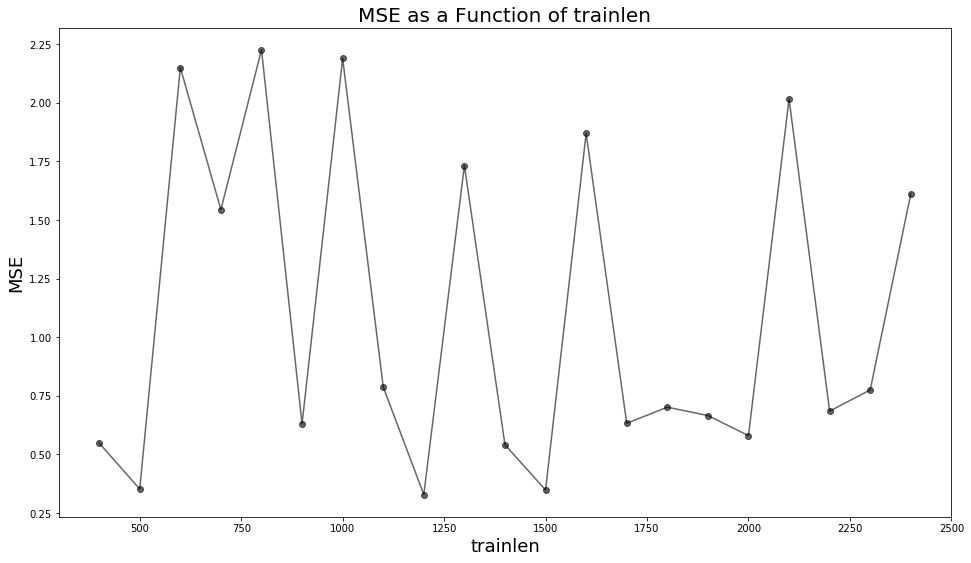

In [15]:
tic = time.perf_counter()
trainingLengths = np.arange(400,2500,100)
trainlen_loss = grid_optimizer(x,
                      params,
                      args=['trainlen'],
                      xset=trainingLengths,
                      verbose=True,
                      visualize=True)

toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

In [16]:
minloss = np.min(trainlen_loss)
index_min = np.where(trainlen_loss == minloss)
l_opt = trainingLengths[index_min][0]
params['trainlen'] = l_opt

print(f"Training length with minimum error was: {l_opt}")

Training length with minimum error was: 1200


In [17]:
tic = time.perf_counter()

opt_pred = esn_prediction(x, params)

toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

This simulation took 25.81 seconds
This simulation took 0.43 minutes


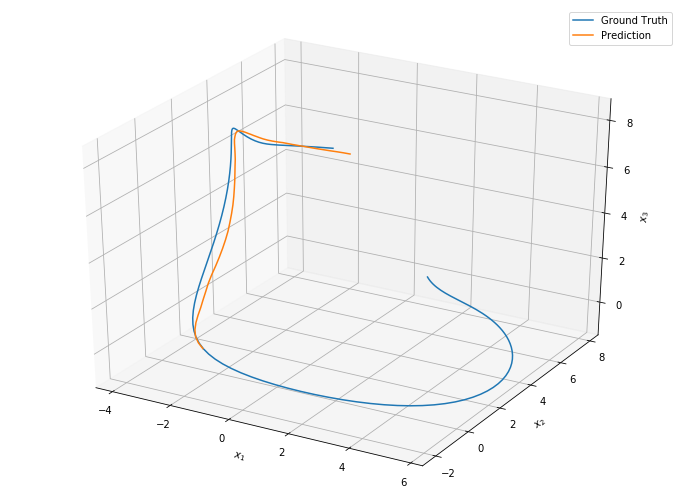

In [25]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection="3d")
ax.plot(x[-2*futureTotal:, 0], x[-2*futureTotal:, 1], x[-2*futureTotal:, 2], label='Ground Truth')
ax.plot(opt_pred[:, 0], opt_pred[:, 1], opt_pred[:, 2], label='Prediction')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.legend()
plt.show()

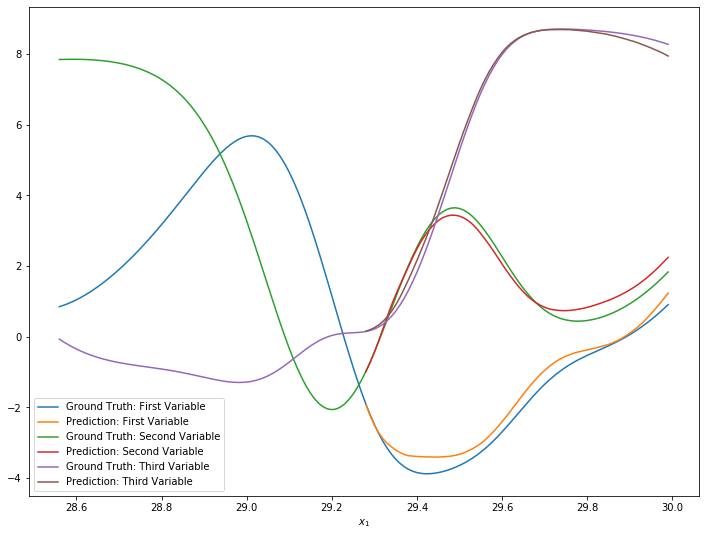

In [26]:
fig, ax = plt.subplots(figsize=(12,9))

futureTotal = params['future']

ax.plot(t[-2*futureTotal:], x[-2*futureTotal:, 0], label='Ground Truth: First Variable')
ax.plot(t[-futureTotal:],opt_pred[:, 0], label='Prediction: First Variable')
ax.plot(t[-2*futureTotal:], x[-2*futureTotal:, 1], label='Ground Truth: Second Variable')
ax.plot(t[-futureTotal:],opt_pred[:, 1], label='Prediction: Second Variable')
ax.plot(t[-2*futureTotal:], x[-2*futureTotal:, 2], label='Ground Truth: Third Variable')
ax.plot(t[-futureTotal:],opt_pred[:, 2], label='Prediction: Third Variable')
ax.set_xlabel("$x_1$")
plt.legend()
plt.show()

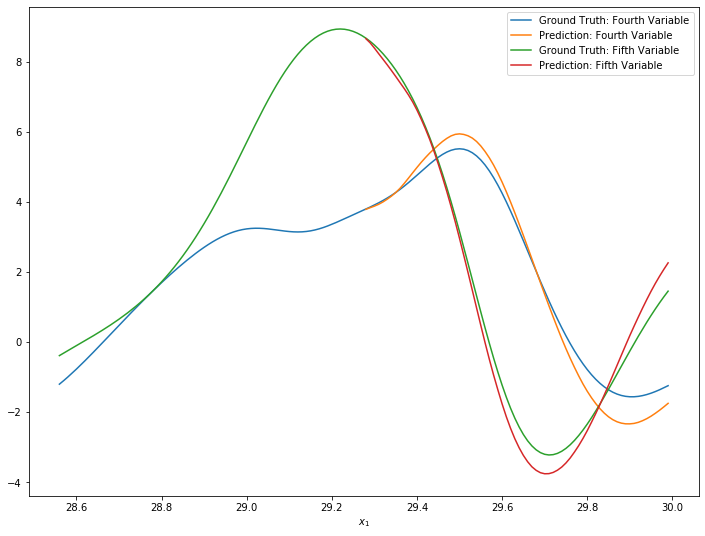

In [28]:
fig, ax = plt.subplots(figsize=(12,9))

futureTotal = params['future']

ax.plot(t[-2*futureTotal:], x[-2*futureTotal:, 3], label='Ground Truth: Fourth Variable')
ax.plot(t[-futureTotal:],opt_pred[:, 3], label='Prediction: Fourth Variable')
ax.plot(t[-2*futureTotal:], x[-2*futureTotal:, 4], label='Ground Truth: Fifth Variable')
ax.plot(t[-futureTotal:],opt_pred[:, 4], label='Prediction: Fifth Variable')

ax.set_xlabel("$x_1$")
plt.legend()
plt.show()